In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from scikitplot.metrics import plot_confusion_matrix
from sklearn.linear_model import LogisticRegression
from sklearn.pipeline import Pipeline
from time import time


In [2]:
import pandas as pd
df = pd.read_csv("../input/clean-16-million-tweets/clean_tweets_again.csv")

In [3]:
df.dropna(inplace = True)
df.drop(columns = 'Unnamed: 0',inplace = True)

In [4]:
X = df['text']
y = df['sentiment']

# here data is split into three chunks namely train set,developement set and test set
#### Train set:sample data that is used for learning
### Developement set:the data used to tune the hyperparameters of the algorithm.
### test set:the data used to test the model

In [5]:
# the data is split in 98|1|1

from sklearn.model_selection import train_test_split
X_train,X_validation_test,y_train,y_validation_test = train_test_split(X,y,test_size = 0.02,random_state = 45)

In [6]:
X_validation,X_test,y_validation,y_test = train_test_split(X_validation_test,y_validation_test,test_size = 0.5,random_state = 45)

In [7]:
train_df = pd.DataFrame(y_train)
percent_positive = len(train_df[train_df['sentiment'] == 1])/len(train_df)
percent_negative = len(train_df[train_df['sentiment'] == 0])/len(train_df)
print('The shape of training set is',len(X_train),'with positive entries as',percent_positive*100,'and negative entries as',percent_negative*100,'\n')
validation_df = pd.DataFrame(y_validation)
percent_positive = len(validation_df[validation_df['sentiment'] == 1])/len(validation_df)
percent_negative = len(validation_df[validation_df['sentiment'] == 0])/len(validation_df)
print('The shape of validation set is',len(X_validation),'with positive entries as',percent_positive*100,'and negative entries as',percent_negative *100,'\n')
test_df = pd.DataFrame(y_test)
percent_positive = len(test_df[test_df['sentiment'] == 1])/len(test_df)
percent_negative = len(test_df[test_df['sentiment'] == 0])/len(test_df)
print('The shape of test set is',len(X_test),'with positive entries as',percent_positive*100,'and negative entries as',percent_negative*100)

The shape of training set is 1564120 with positive entries as 49.99469350177736 and negative entries as 50.005306498222645 

The shape of validation set is 15960 with positive entries as 49.85588972431078 and negative entries as 50.14411027568922 

The shape of test set is 15961 with positive entries as 49.55829835223357 and negative entries as 50.441701647766436


**during comparision of various machine learning algorithms baseline is used as point of refrence to compare for this we will be using the zero classifier which only identifies majority class even though there is predicting power in this classifier this will be useful in determining the baseline**

**another baseline for the classification of data is text blob which has a builtin sentiment classifier**

In [8]:
from textblob import TextBlob
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

In [9]:
text_blob_result = [TextBlob(i).sentiment.polarity for i in X_validation]
text_blob_predictor = [0 if x < 0 else 1 for x in text_blob_result]

              precision    recall  f1-score   support

           0       0.32      0.77      0.45      3322
           1       0.91      0.57      0.70     12638

    accuracy                           0.61     15960
   macro avg       0.61      0.67      0.58     15960
weighted avg       0.78      0.61      0.65     15960



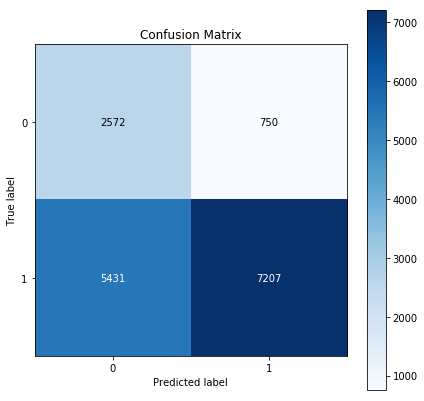

In [10]:
plot_confusion_matrix(text_blob_predictor, y_validation,figsize=(7,7))
print(classification_report(text_blob_predictor,y_validation))

**using text blob we get accuracy of 0.61 with very poor f1 score**

**Feature Extraction using bag of words CountVectorizer**

In [11]:
if len(X_test[y_test == 0])/len(X_test) > 0.5:
    null_accuracy = len(X_test[y_test == 0])/len(X_test)
else:
    null_accuracy = 1 - len(X_test[y_test == 0])/len(X_test)

number_of_features = np.arange(10000,100001,10000)
clf = LogisticRegression(n_jobs = -1,verbose = 8)
count_vec = CountVectorizer()
result = []
print(clf)
print('\n')
for number in number_of_features:
    count_vec.set_params(stop_words = None,max_features = number,ngram_range = (1,1))
    pipeline = Pipeline([('vectorizer',count_vec),('classifier',clf)],verbose = 1)
    print('validation result for {} features'.format(number))
    t0 = time()
    pipeline.fit(X_train,y_train)
    pred = pipeline.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(pred,y_test)
    print('the training and testing time is ',train_test_time,' seconds')
    if accuracy > null_accuracy:
        print('accurcy',accuracy,' greatet than null accuracy ',null_accuracy)
    else:
        print('accurcy',accuracy,' less than null accuracy ',null_accuracy)
result.append((number,accuracy,train_test_time))
        

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=8,
                   warm_start=False)


validation result for 10000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  41.4s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   39.0s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  39.7s
the training and testing time is  81.59990000724792  seconds
accurcy 0.799198045235261  greatet than null accuracy  0.5044170164776643
validation result for 20000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  42.2s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   43.1s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  43.8s
the training and testing time is  86.45593738555908  seconds
accurcy 0.8006390577031515  greatet than null accuracy  0.5044170164776643
validation result for 30000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  41.6s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   44.5s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  45.2s
the training and testing time is  87.18407845497131  seconds
accurcy 0.8012655848631038  greatet than null accuracy  0.5044170164776643
validation result for 40000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  41.7s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   48.4s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  49.0s
the training and testing time is  91.22784352302551  seconds
accurcy 0.8011402794311133  greatet than null accuracy  0.5044170164776643
validation result for 50000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  41.8s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   48.8s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  49.5s
the training and testing time is  91.75205087661743  seconds
accurcy 0.8037090407869181  greatet than null accuracy  0.5044170164776643
validation result for 60000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  40.8s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   55.2s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  55.9s
the training and testing time is  97.14022588729858  seconds
accurcy 0.80157884844308  greatet than null accuracy  0.5044170164776643
validation result for 70000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  42.2s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   55.4s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  56.1s
the training and testing time is  98.67172193527222  seconds
accurcy 0.8025186391830086  greatet than null accuracy  0.5044170164776643
validation result for 80000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  40.7s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   59.1s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  59.8s
the training and testing time is  100.94207835197449  seconds
accurcy 0.8025812918990038  greatet than null accuracy  0.5044170164776643
validation result for 90000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  40.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.0min finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total= 1.0min
the training and testing time is  102.46230292320251  seconds
accurcy 0.8004510995551657  greatet than null accuracy  0.5044170164776643
validation result for 100000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  40.1s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:  1.1min finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total= 1.1min
the training and testing time is  104.78896450996399  seconds
accurcy 0.8019547647390515  greatet than null accuracy  0.5044170164776643


In [12]:
print('computation with unigram and stopwords')
if len(X_test[y_test == 0])/len(X_test) > 0.5:
    null_accuracy = len(X_test[y_test == 0])/len(X_test)
else:
    null_accuracy = 1 - len(x_test[y_test == 0])/len(X_test)
number_of_features = np.arange(10000,100001,10000)
clf = LogisticRegression(n_jobs = -1,verbose = 8)
count_vec = CountVectorizer()
result_unigram_without_stopwords = []
print(clf)
print('\n')
for number in number_of_features:
    count_vec.set_params(stop_words = 'english',max_features = number,ngram_range = (1,1))
    pipeline = Pipeline([('vectorizer',count_vec),('classifier',clf)],verbose = 1)
    print('validation result for {} features'.format(number))
    t0 = time()
    pipeline.fit(X_train,y_train)
    pred = pipeline.predict(X_test)
    train_test_time = time() - t0
    accuracy = accuracy_score(pred,y_test)
    print('the training and testing time is ',train_test_time,' seconds')
    if accuracy > null_accuracy:
        print('accuracy',accuracy,'greater then null accuracy',null_accuracy)
    else:
        print('accuracy',accuracy,'less than null accuracy',null_accuracy)
    print('\n')  
result_unigram_without_stopwords.append((number,accuracy,train_test_time))

computation with unigram and stopwords
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=-1, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=8,
                   warm_start=False)


validation result for 10000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  35.8s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   33.2s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  33.5s
the training and testing time is  69.7330904006958  seconds
accuracy 0.7740743061211703 greater then null accuracy 0.5044170164776643


validation result for 20000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  36.3s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   37.2s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  37.6s
the training and testing time is  74.31592845916748  seconds
accuracy 0.7758912348850323 greater then null accuracy 0.5044170164776643


validation result for 30000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  36.7s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   38.3s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  38.7s
the training and testing time is  75.82324075698853  seconds
accuracy 0.7754526658730656 greater then null accuracy 0.5044170164776643


validation result for 40000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  36.4s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   38.5s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  38.9s
the training and testing time is  75.64455580711365  seconds
accuracy 0.7759538876010275 greater then null accuracy 0.5044170164776643


validation result for 50000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  36.5s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   44.9s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  45.3s
the training and testing time is  82.10972094535828  seconds
accuracy 0.7776455109328989 greater then null accuracy 0.5044170164776643


validation result for 60000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  37.0s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   47.0s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  47.4s
the training and testing time is  84.83391904830933  seconds
accuracy 0.7755153185890609 greater then null accuracy 0.5044170164776643


validation result for 70000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  36.7s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   50.2s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  50.6s
the training and testing time is  87.71091318130493  seconds
accuracy 0.7754526658730656 greater then null accuracy 0.5044170164776643


validation result for 80000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  37.3s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   50.0s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  50.4s
the training and testing time is  88.10308289527893  seconds
accuracy 0.7761418457490132 greater then null accuracy 0.5044170164776643


validation result for 90000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  36.7s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   56.0s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  56.3s
the training and testing time is  93.47426104545593  seconds
accuracy 0.7750140968610989 greater then null accuracy 0.5044170164776643


validation result for 100000 features
[Pipeline] ........ (step 1 of 2) Processing vectorizer, total=  36.9s


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 4 concurrent workers.
[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   58.9s finished


[Pipeline] ........ (step 2 of 2) Processing classifier, total=  59.3s
the training and testing time is  96.69245052337646  seconds
accuracy 0.7772069419209323 greater then null accuracy 0.5044170164776643




**lets create a list of custom stopwords in this case we will add custom stopwords selected from top 10 features in the list**

In [13]:
results

NameError: name 'results' is not defined